In [1]:
import sys
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.utils.vis_utils import plot_model

2021-10-14 12:39:35.079227: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-14 12:39:35.499360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4741
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3567
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3211
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2979
Epoch 5/5
313/313 [==============================] - 0s 938us/step - loss: 0.3503
[1.5439231e-05 3.6571007e-12 9.9974841e-01 5.2701293e-10 9.6366181e-05
 1.9137128e-13 1.3976778e-04 7.2518879e-16 1.0260864e-10 2.2546132e-12]
2
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              

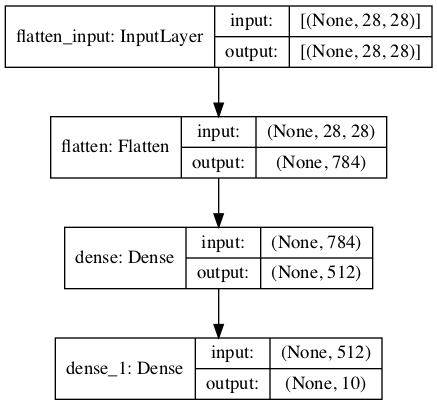

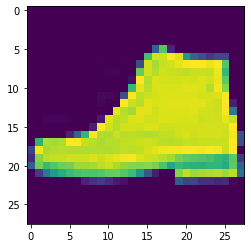

In [2]:
mnist = keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(training_images[42])

training_images = training_images / 255
test_images = test_images / 255

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, tf.nn.relu),
                                    tf.keras.layers.Dense(10, tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)


print(classifications[1])
print(test_labels[1])

print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)